In [5]:
# UTILS

from numpy import prod, round, abs, array
import matplotlib.pyplot as plt
from sklearn import datasets
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import scipy

# Establece la semilla para la generación de números aleatorios
np.random.seed(1)
x = np.random.normal(size=100, loc=2)
y = np.random.normal(size=100, loc=5)

# Función que calcula una funció de un conjunto de datos
def T(x):
  return mean(x)

# Función para calcular la media aritmética de un arreglo
def mean(x) -> float:
  return sum(x)/len(x)

# Función que calcula la media cuadrática (RMS) de un arreglo
def sq_mean(x) -> float:
  return np.sqrt(sum(x**2)/len(x))

# Función para calcular la media geométrica
def geo_mean(x) -> float:
  return (np.prod(x))**(1/len(x))

# Función para calcular la media ponderada de un arreglo, dada una lista de pesos
def w_mean(w, x) -> float:
  if np.round(sum(w),3) != 1.000:
    raise ValueError("Weights must sum to 1")
  return sum((x*w))

# Función para calcular la media truncada, que elimina el porcentaje 'alpha' de los valores extremos
def trim_mean(x, alpha) -> float:
  if alpha >= 0.5 or alpha <= 0:
    raise ValueError("Alpha must be less than 0.5 and greater than 0")
  p = (alpha/2)*len(x)
  return np.mean(np.sort(x)[int(p):-int(p)])

# Función que calcula la mediana de un conjunto de datos
def median(x):
  n = len(x)
  x = sorted(x)
  if n % 2 == 1:
    return x[(n+1)//2-1]
  else:
    return (x[n//2] + x[n//2-1])/2

# Función para calcular la desviación estándar (corregida)
def sd(x):
  x_bar = sum(x)/len(x)
  return ((sum((x-x_bar)**2)/(len(x)-1))**(1/2))

# Función que calcula la desviación absoluta mediana (MAD)
def mad(x, k = 1/0.6745):
  x_tilde = median(x)
  return k*median(np.abs(x-x_tilde))

# Coeficiente de corrección calculado como la relación entre la desviación estándar y el MAD
md = mad(x, k=1)
k = sd(x)/md

# Función que calcula la covarianza entre dos conjuntos de datos
def cov(x, y):
  if len(x) == len(y):
    x_bar = mean(x)
    y_bar = mean(y)
    n = len(x)
    return(sum((x-x_bar)*(y-y_bar))/(n-1))
  else:
    return("Los vectores tienen que tener el mismo largo")

# Función que calcula la covarianza robusta usando medianas
def com(x, y):
  x_median = median(x)
  y_median = median(y)
  return(median((x-x_median)*(y-y_median)))

# Función que calcula el coeficiente de correlación de Pearson
def corr_pearson(x, y):
  return(cov(x, y)/(sd(x)*sd(y)))

# Función que calcula el coeficiente de correlación robusto usando MAD
def corr_com(x, y):
  return(com(x, y)/(mad(x, k=1)*mad(y, k=1)))

# Función para obtener el ranking de los valores de un conjunto de datos
def rank(x):
  x_rank2 = []
  x_sort = sorted(x)
  for i in range(len(x)):
    x_rank2.append(x_sort.index(x[i]) + 1)
  return(array(x_rank2))

# Función que calcula el coeficiente de correlación de Spearman
def rho_spearman(x, y):
  n = len(x)
  return(1-((6*sum((rank(x) - rank(y))**2))/(n*((n**2)-1))))

# Función que calcula el coeficiente de correlación de Kendall
def corr_kendall(x,y):
    if len(x) != len(y):
        raise ValueError("Arguments have unequal length")
    c = 0
    d = 0
    new_x, new_y = zip(*sorted(zip(x, y)))
    for i in range(len(x)):
        for j in range(i+1,len(x)):
            if new_y[i] <= new_y[j]:
                c+=1
            else:
                d+=1
    return (c-d)/(c+d)

# Función que calcula el estimador T-barra usando Jackknife
def t_bar(data, estimator, robust):
    estimations = []
    for i in range(len(data)):
        newlist = data.copy()
        del newlist[i]
        estimations.append(estimator(newlist))
    if robust:
        return np.median(estimations)
    return np.mean(estimations)

# Función que calcula el sesgo de Jackknife
def bias_jackknife(data, estimator, robust=False):
    data = list(data)
    mean_t = t_bar(data, estimator, robust)
    return (len(data)-1) * (mean_t - estimator(data))

# Función que calcula el estimador usando Jackknife
def estimator_jackknife(data, estimator, robust=False):
    data = np.array(data)
    T_data = estimator(data)
    T_vector = np.empty(len(data))

    for i in range(len(data)):
        T_excluded = estimator(np.delete(data, i))
        T_vector[i] = len(data) * T_data - (len(data) - 1) * T_excluded

    if robust:
        return np.median(T_vector), T_vector
    return np.mean(T_vector), T_vector

# Método Bootstrap a un estimador para obtener su distribución, estimación promedio y varianza
def bootstrap_estimator(x, T, B=500):
    n = len(x)
    x = np.array(x)
    T_boots = []

    for _ in range(B):
        x_resample = np.random.choice(x, size=n)
        T_boots.append(T(x_resample))

    T_boots = np.array(T_boots)

    T_boot = mean(T_boots)
    var_boot = mean((T_boots - mean(T_boots))**2)
    return {"distro": T_boots, "Estimador": T_boot, "VarEstimator": var_boot}

# Función de distribución empírica (ECDF) de un conjunto de datos
def ECDF(x):
    n = len(x)
    x = sorted(x)
    ECDF_list = []
    for i in range(len(x)):
        ECDF_list.append(i/n)
    return [x, ECDF_list]




#print(f"Mean: {mean(x)}")
#print(f"Square mean: {sq_mean(x)}")
#print(f"Geometric mean: {geo_mean(x)}")
w=np.random.uniform(1,100,size=len(x)); w/=sum(w);
#print(f"Weighted mean: {w_mean(w, x)}")
alpha = 0.2
#print(f"Alpha: {alpha}. Trim mean: {trim_mean(x, alpha)}")
#print(f"Mediana (Q2): {median(x)}")
#print(f"Standard Deviation: {sd(x)}")
#print(f"MAD: {mad(x, k=1)}")
#print(f"Coeficiente de corrección: {k}")
#print(f"Pearson: {corr_pearson(x,y)}")
#print(f"Spearman: {rho_spearman(x,y)}")
#print(f"Kendall: {corr_kendall(x,y)}")
#print(f"Bias Jackknife: {bias_jackknife(x, T)}")
boots = bootstrap_estimator(x, T)
#print(f"Estimador Boostrap para sd: {round(boots['Estimador'],4)}")
#print(f"Varianza del estimador: {round(boots['VarEstimator'],4)}")
#plt.hist(boots["distro"])
#plt.plot(ECDF(x)[0], ECDF(x)[1])

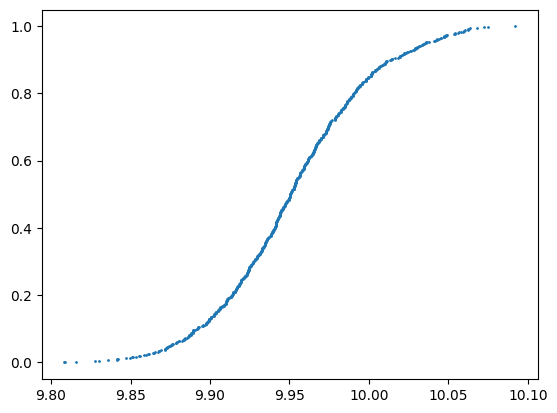

In [6]:
from scipy.interpolate import splrep, BSpline
from scipy.interpolate import make_interp_spline

np.random.seed(123)

def ECDF(x):
  n = len(x)
  x = sorted(x)
  ECDF_list = []
  for i in range(len(x)):
    ECDF_list.append(i/n)
  return [x, ECDF_list]

ecdf = ECDF(x)

def bootstrap_estimator(x, T, B = 500):
  n = len(x)
  x = np.array(x)
  T_boots = []

  for _ in range(B):
    x_resample = np.random.choice(x, size = n)
    T_boots.append(T(x_resample))

  T_boots = np.array(T_boots)

  T_boot = mean(T_boots)
  var_boot = mean((T_boots - mean(T_boots))**2)
  return ({"distro": T_boots, "Estimador": T_boot, "VarEstimator": var_boot})

boots = bootstrap_estimator(x, T)

def T(x):
  return mean(x)

B = 735
x = np.random.normal(loc = 10, size = 500)
median_boot = bootstrap_estimator(x, T, B = B)
median_ecdf = ECDF(median_boot["distro"])

plt.scatter(median_ecdf[0], median_ecdf[1], s=1)

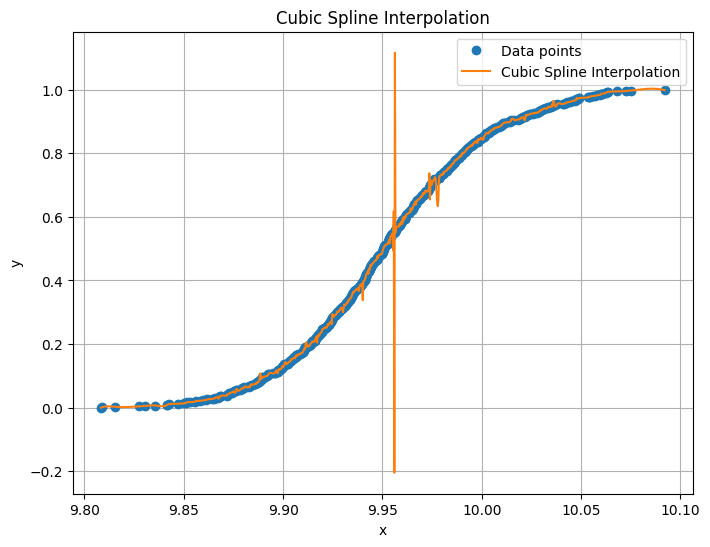

In [8]:
from scipy.interpolate import CubicSpline

x_ee = []
y_ee = []

def cubic_spline_interpolation(x, y):

    # Ensure x and y are numpy arrays
    x = np.asarray(x)
    y = np.asarray(y)

    # Create a cubic spline interpolation function
    cs = CubicSpline(x, y)

    # Generate a range of x values for plotting
    x_dense = np.linspace(x.min(), x.max(), 1000)

    # Evaluate the spline at the dense x values
    y_dense = cs(x_dense)
    global x_ee
    global y_ee
    x_ee = x_dense.copy()
    y_ee = y_dense.copy()

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o', label='Data points')
    plt.plot(x_dense, y_dense, '-', label='Cubic Spline Interpolation')
    plt.title('Cubic Spline Interpolation')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

cubic_spline_interpolation(median_ecdf[0], median_ecdf[1])

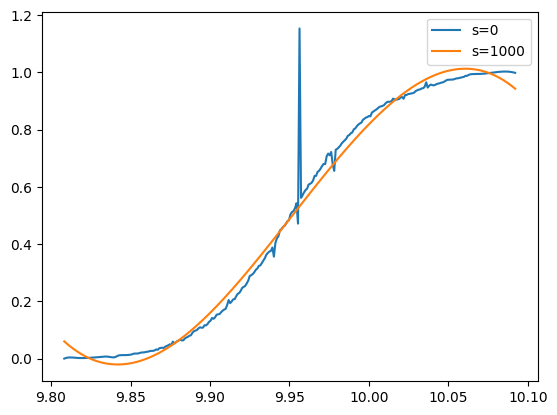

In [10]:
x = x_ee.copy()
f = y_ee.copy()

xnew = np.linspace(x.min(), x.max(), 300)

gfg = make_interp_spline(x, f, k=3)

y_new = gfg(xnew)

tck = splrep(x, f, s=0)
tck_s = splrep(x, f, s=len(x))

plt.plot(xnew, BSpline(*tck)(xnew), '-', label='s=0')
plt.plot(xnew, BSpline(*tck_s)(xnew), '-', label=f's={len(x)}')
plt.legend()
plt.show()

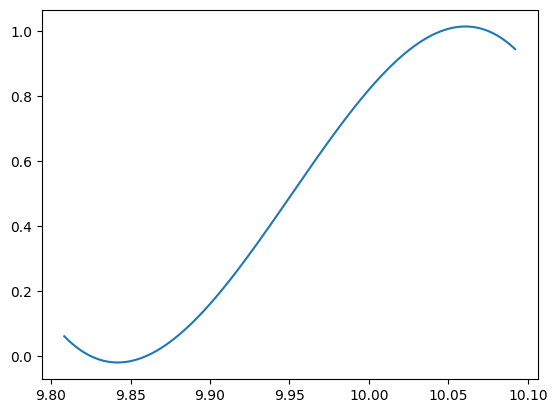

In [11]:
plt.plot(xnew, BSpline(*tck_s)(xnew), '-', label=f'Suavizado')

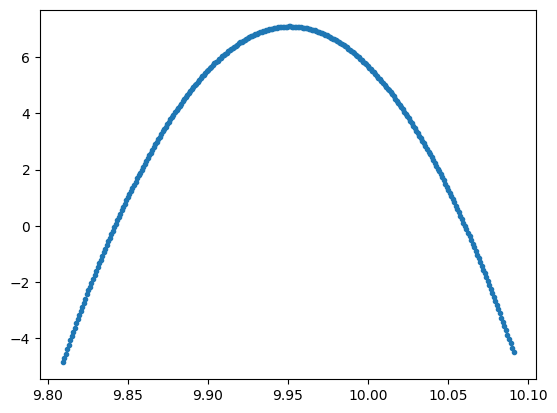

In [14]:
x = xnew.copy()
f = BSpline(*tck_s)(xnew).copy()

derivada = []
for i in range(1, len(x)-1):
  dif1 = (f[i] - f[i-1])/(x[i]-x[i-1])
  dif2 = (f[i] - f[i+1])/(x[i]-x[i+1])
  derivada.append(0.5*dif1+0.5*dif2)

plt.plot(x[1:len(x)-1], derivada, '.')